<a href="https://colab.research.google.com/github/aweeeaja/JST-Neural-Network-/blob/main/RNN_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [ ]:
path_train=('/content/drive/MyDrive/perceptron/RNN/train.csv')
data_train=pd.read_csv(path_train)

In [ ]:
path_test=('/content/drive/MyDrive/perceptron/RNN/Test_Jan.csv')
data_test=pd.read_csv(path_test)

In [ ]:
path_predict=('/content/drive/MyDrive/perceptron/RNN/Predict_Jan.csv')
data_test_predict=pd.read_csv(path_predict)

In [ ]:
data_train.index = pd.to_datetime(data_train['datetime'], format='%d-%m-%Y %H:%M')
data_test_predict.index = pd.to_datetime(data_test_predict['datetime'], format='%d-%m-%Y %H:%M')

<Axes: xlabel='datetime'>

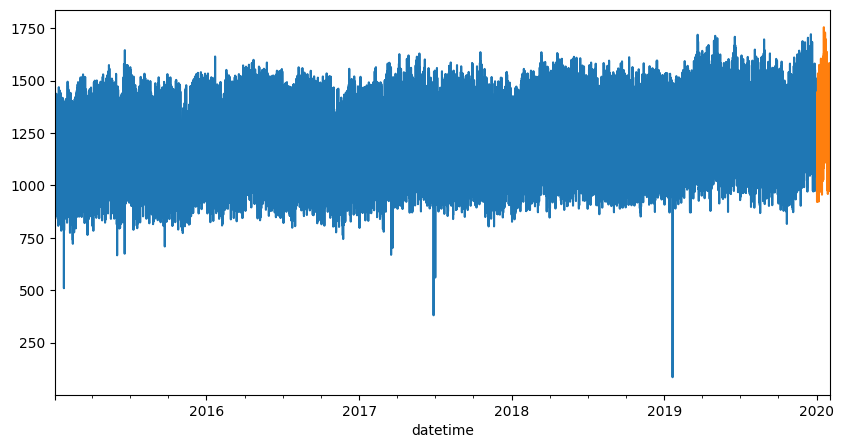

In [ ]:
temp_train = data_train['nat_demand']
temp_test = data_test_predict['nat_demand']
temp_train.plot(figsize=(10,5))
temp_test.plot()

In [ ]:
# fitur dan target train
fitur_train = data_train.drop(['datetime', 'nat_demand'], axis = 1).values
target_train = data_train['nat_demand'].values

In [ ]:
# fitur dan target test
fitur_test = data_test.drop(['datetime', 'nat_demand'], axis = 1).values
target_test = data_test_predict['nat_demand'].values

In [ ]:
# Normalisasi Data
scaler = MinMaxScaler()
scaled_fitur_train = scaler.fit_transform(fitur_train)
scaled_target_train = scaler.fit_transform(target_train.reshape(-1, 1))
scaled_fitur_test = scaler.fit_transform(fitur_test)
scaled_target_test = scaler.fit_transform(target_test.reshape(-1, 1))

In [ ]:
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

In [ ]:
# Pembangunan Model RNN

model = Sequential()
# model.add(Embedding(64, output_dim=128))
model.add(GRU(64, activation='tanh', return_sequences=True,
               input_shape=(scaled_fitur_train.shape[1], 1)))
model.add(GRU(64, activation='tanh', return_sequences=True))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dense(1, activation='relu'))

model.compile(optimizer=AdamW(learning_rate=0.00001), loss='mean_squared_error')

In [ ]:
# Preview Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15, 64)            12864     
                                                                 
 gru_1 (GRU)                 (None, 15, 64)            24960     
                                                                 
 dropout (Dropout)           (None, 15, 64)            0         
                                                                 
 flatten (Flatten)           (None, 960)               0         
                                                                 
 dense (Dense)               (None, 64)                61504     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 99393 (388.25 KB)
Trainable params: 99393 

In [ ]:
train_fitur, val_fitur, train_label, val_label = train_test_split(scaled_fitur_train,
                                                                  scaled_target_train,
                                                                  train_size=0.8)

model.fit(train_fitur, train_label, epochs=10, batch_size=64,
          validation_data=(val_fitur, val_label))

Epoch 1/10
548/548 [==============================] - 15s 10ms/step - loss: 0.0978 - val_loss: 0.0122
Epoch 2/10
548/548 [==============================] - 3s 6ms/step - loss: 0.0143 - val_loss: 0.0114
Epoch 3/10
548/548 [==============================] - 4s 7ms/step - loss: 0.0132 - val_loss: 0.0105
Epoch 4/10
548/548 [==============================] - 4s 7ms/step - loss: 0.0121 - val_loss: 0.0097
Epoch 5/10
548/548 [==============================] - 4s 8ms/step - loss: 0.0113 - val_loss: 0.0091
Epoch 6/10
548/548 [==============================] - 4s 7ms/step - loss: 0.0105 - val_loss: 0.0086
Epoch 7/10
548/548 [==============================] - 4s 7ms/step - loss: 0.0100 - val_loss: 0.0082
Epoch 8/10
548/548 [==============================] - 4s 8ms/step - loss: 0.0095 - val_loss: 0.0080
Epoch 9/10
548/548 [==============================] - 4s 7ms/step - loss: 0.0092 - val_loss: 0.0077
Epoch 10/10
548/548 [==============================] - 4s 7ms/step - loss: 0.0087 - val_loss: 0.00

In [ ]:
best_training_loss = model.history.history['loss'][-1]

print('Nilai loss pada saat training:', round(best_training_loss, 4))

Nilai loss pada saat training: 0.0087


24/24 [==============================] - 1s 2ms/step


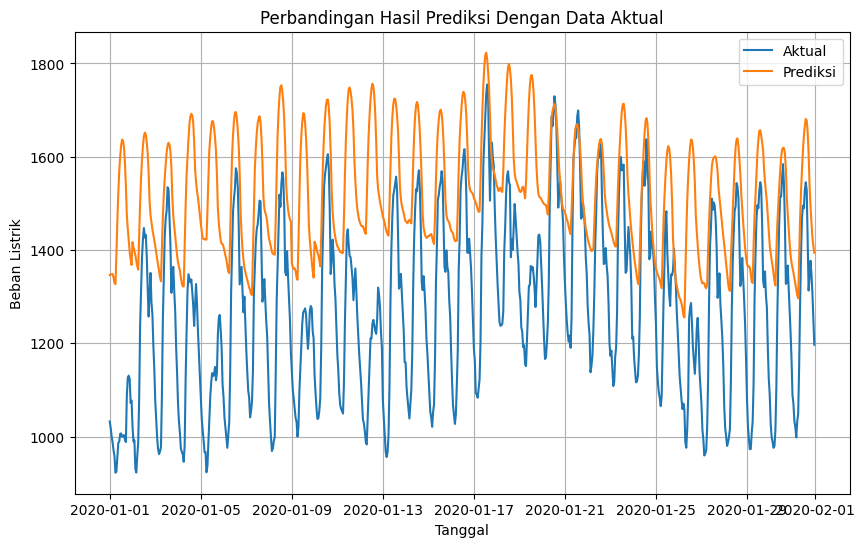

In [ ]:
predict = model.predict(scaled_fitur_test).flatten().reshape(-1,1)
predict_inverse = scaler.inverse_transform(predict)

plt.figure(figsize=(10, 6))
plt.plot(data_test_predict.index, target_test, label='Aktual')
plt.plot(data_test_predict.index, predict_inverse, label='Prediksi')
plt.title('Perbandingan Hasil Prediksi Dengan Data Aktual')
plt.xlabel('Tanggal')
plt.ylabel('Beban Listrik')
plt.legend()
plt.grid(True)
plt.show()

# **PERCOBAAN 2**

In [ ]:
# Pembangunan Model RNN

model = Sequential()
# model.add(Embedding(64, output_dim=128))
model.add(LSTM(128, activation='relu', return_sequences=True,
               input_shape=(scaled_fitur_train.shape[1], 1)))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=AdamW(learning_rate=0.00001), loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 15, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 15, 128)           0         
                                                                 
 flatten_1 (Flatten)         (None, 1920)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                122944    
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                

In [ ]:
train_fitur, val_fitur, train_label, val_label = train_test_split(scaled_fitur_train,
                                                                  scaled_target_train,
                                                                  train_size=0.8)

model.fit(train_fitur, train_label, epochs=10, batch_size=128,
          validation_data=(val_fitur, val_label))

Epoch 1/10
274/274 [==============================] - 16s 42ms/step - loss: 0.3501 - val_loss: 0.1373
Epoch 2/10
274/274 [==============================] - 13s 46ms/step - loss: 0.0291 - val_loss: 0.0098
Epoch 3/10
274/274 [==============================] - 14s 50ms/step - loss: 0.0105 - val_loss: 0.0097
Epoch 4/10
274/274 [==============================] - 13s 46ms/step - loss: 0.0104 - val_loss: 0.0096
Epoch 5/10
274/274 [==============================] - 13s 46ms/step - loss: 0.0104 - val_loss: 0.0096
Epoch 6/10
274/274 [==============================] - 12s 44ms/step - loss: 0.0102 - val_loss: 0.0095
Epoch 7/10
274/274 [==============================] - 10s 38ms/step - loss: 0.0101 - val_loss: 0.0094
Epoch 8/10
274/274 [==============================] - 12s 45ms/step - loss: 0.0100 - val_loss: 0.0093
Epoch 9/10
274/274 [==============================] - 12s 45ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 10/10
274/274 [==============================] - 12s 45ms/step - loss: 0.009

24/24 [==============================] - 0s 6ms/step


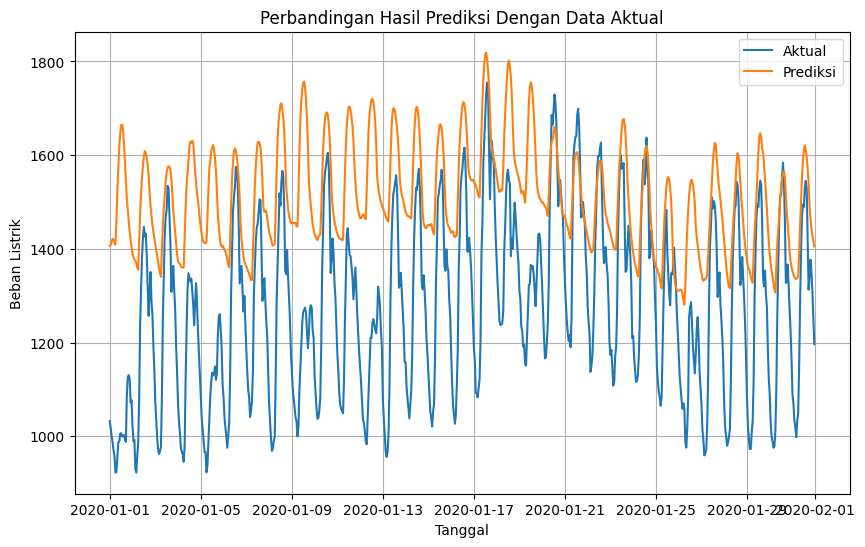

In [ ]:
predict = model.predict(scaled_fitur_test).flatten().reshape(-1,1)
predict_inverse = scaler.inverse_transform(predict)

plt.figure(figsize=(10, 6))
plt.plot(data_test_predict.index, target_test, label='Aktual')
plt.plot(data_test_predict.index, predict_inverse, label='Prediksi')
plt.title('Perbandingan Hasil Prediksi Dengan Data Aktual')
plt.xlabel('Tanggal')
plt.ylabel('Beban Listrik')
plt.legend()
plt.grid(True)
plt.show()

# **PERCOBAAN 3**

In [ ]:
# Pembangunan Model RNN

model = Sequential()
model.add(Embedding(11160,output_dim=64, input_length=15))
model.add(LSTM(64, activation='relu', return_sequences=True,
               input_shape=(scaled_fitur_train.shape[1], 1)))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(Flatten())
# model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=AdamW(learning_rate=0.00001), loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 64)            714240    
                                                                 
 lstm (LSTM)                 (None, 15, 64)            33024     
                                                                 
 lstm_1 (LSTM)               (None, 15, 64)            33024     
                                                                 
 dropout (Dropout)           (None, 15, 64)            0         
                                                                 
 flatten (Flatten)           (None, 960)               0         
                                                                 
 dense (Dense)               (None, 64)                61504     
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
train_fitur, val_fitur, train_label, val_label = train_test_split(scaled_fitur_train,
                                                                  scaled_target_train,
                                                                  train_size=0.8)

model.fit(train_fitur, train_label, epochs=20, batch_size=64,
          validation_data=(val_fitur, val_label))

Epoch 1/20
548/548 [==============================] - 33s 50ms/step - loss: 0.2319 - val_loss: 0.0145
Epoch 2/20
548/548 [==============================] - 27s 49ms/step - loss: 0.0161 - val_loss: 0.0138
Epoch 3/20
548/548 [==============================] - 28s 50ms/step - loss: 0.0159 - val_loss: 0.0138
Epoch 4/20
548/548 [==============================] - 29s 53ms/step - loss: 0.0158 - val_loss: 0.0138
Epoch 5/20
548/548 [==============================] - 32s 59ms/step - loss: 0.0158 - val_loss: 0.0138
Epoch 6/20
548/548 [==============================] - 27s 50ms/step - loss: 0.0158 - val_loss: 0.0138
Epoch 7/20
548/548 [==============================] - 26s 47ms/step - loss: 0.0154 - val_loss: 0.0138
Epoch 8/20
548/548 [==============================] - 27s 49ms/step - loss: 0.0154 - val_loss: 0.0138
Epoch 9/20
548/548 [==============================] - 28s 50ms/step - loss: 0.0153 - val_loss: 0.0140
Epoch 10/20
548/548 [==============================] - 27s 49ms/step - loss: 0.015

In [ ]:
best_training_loss = model.history.history['loss'][-1]

print('Nilai loss pada saat training:', round(best_training_loss, 4))

Nilai loss pada saat training: 0.0147


24/24 [==============================] - 0s 6ms/step


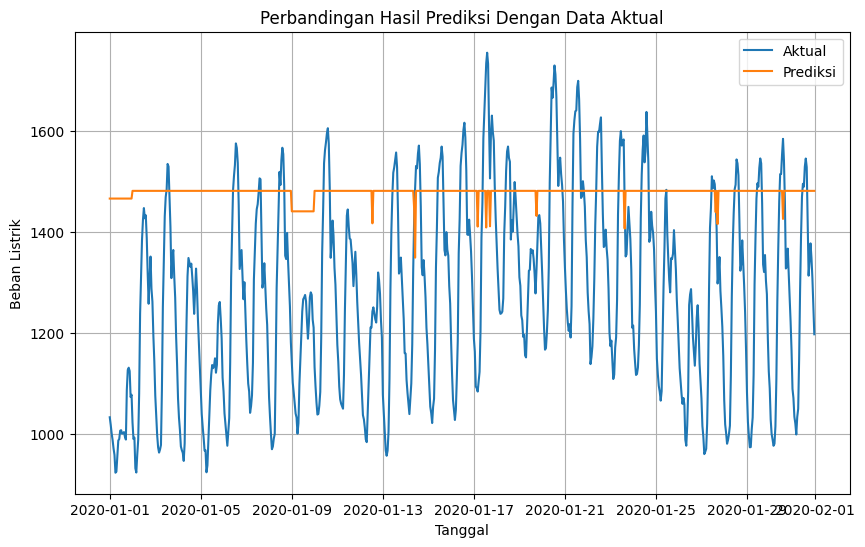

In [ ]:
predict = model.predict(scaled_fitur_test).flatten().reshape(-1, 1)
predict_inverse = scaler.inverse_transform(predict)

plt.figure(figsize=(10, 6))
plt.plot(data_test_predict.index, target_test, label='Aktual')
plt.plot(data_test_predict.index, predict_inverse, label='Prediksi')
plt.title('Perbandingan Hasil Prediksi Dengan Data Aktual')
plt.xlabel('Tanggal')
plt.ylabel('Beban Listrik')
plt.legend()
plt.grid(True)
plt.show()

# **PERCOBAAN 4**

In [ ]:
from tensorflow.keras.layers import Bidirectional

In [ ]:
# Pembangunan Model RNN

model = Sequential()
model.add(Embedding(11160,output_dim=64, input_length=15))
model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True,
               input_shape=(scaled_fitur_train.shape[1], 1))))
model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=AdamW(learning_rate=0.00001), loss='mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 15, 64)            714240    
                                                                 
 bidirectional (Bidirection  (None, 15, 128)           66048     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [ ]:
train_fitur, val_fitur, train_label, val_label = train_test_split(scaled_fitur_train,
                                                                  scaled_target_train,
                                                                  train_size=0.8)

model.fit(train_fitur, train_label, epochs=10, batch_size=64,
          validation_data=(val_fitur, val_label))

Epoch 1/10
548/548 [==============================] - 56s 89ms/step - loss: 0.3101 - val_loss: 0.0626
Epoch 2/10
548/548 [==============================] - 51s 93ms/step - loss: 0.0250 - val_loss: 0.0139
Epoch 3/10
548/548 [==============================] - 48s 88ms/step - loss: 0.0204 - val_loss: 0.0139
Epoch 4/10
548/548 [==============================] - 48s 87ms/step - loss: 0.0196 - val_loss: 0.0139
Epoch 5/10
548/548 [==============================] - 49s 89ms/step - loss: 0.0191 - val_loss: 0.0139
Epoch 6/10
548/548 [==============================] - 50s 91ms/step - loss: 0.0184 - val_loss: 0.0140
Epoch 7/10
548/548 [==============================] - 48s 88ms/step - loss: 0.0178 - val_loss: 0.0142
Epoch 8/10
548/548 [==============================] - 48s 87ms/step - loss: 0.0176 - val_loss: 0.0146
Epoch 9/10
548/548 [==============================] - 50s 91ms/step - loss: 0.0174 - val_loss: 0.0145
Epoch 10/10
548/548 [==============================] - 48s 88ms/step - loss: 0.016

In [ ]:
best_training_loss = model.history.history['loss'][-1]

print('Nilai loss pada saat training:', round(best_training_loss, 4))

Nilai loss pada saat training: 0.0168


24/24 [==============================] - 1s 11ms/step


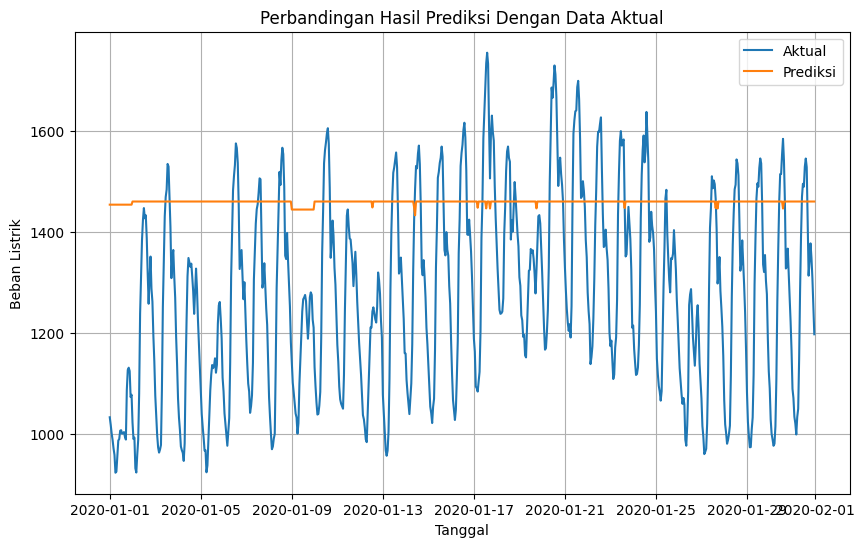

In [ ]:
predict = model.predict(scaled_fitur_test).flatten().reshape(-1,1)
predict_inverse = scaler.inverse_transform(predict)

plt.figure(figsize=(10, 6))
plt.plot(data_test_predict.index, target_test, label='Aktual')
plt.plot(data_test_predict.index, predict_inverse, label='Prediksi')
plt.title('Perbandingan Hasil Prediksi Dengan Data Aktual')
plt.xlabel('Tanggal')
plt.ylabel('Beban Listrik')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Pembangunan Model RNN

model = Sequential()
# model.add(Embedding(11160,output_dim=64, input_length=15))
model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True,
               input_shape=(scaled_fitur_train.shape[1], 1))))
model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=AdamW(learning_rate=0.00001), loss='mean_squared_error')
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
train_fitur, val_fitur, train_label, val_label = train_test_split(scaled_fitur_train,
                                                                  scaled_target_train,
                                                                  train_size=0.8)

model.fit(train_fitur, train_label, epochs=10, batch_size=64,
          validation_data=(val_fitur, val_label))

In [ ]:
best_training_loss = model.history.history['loss'][-1]

print('Nilai loss pada saat training:', round(best_training_loss, 4))

In [ ]:
predict = model.predict(scaled_fitur_test).flatten().reshape(-1,1)
predict_inverse = scaler.inverse_transform(predict)

plt.figure(figsize=(10, 6))
plt.plot(data_test_predict.index, target_test, label='Aktual')
plt.plot(data_test_predict.index, predict_inverse, label='Prediksi')
plt.title('Perbandingan Hasil Prediksi Dengan Data Aktual')
plt.xlabel('Tanggal')
plt.ylabel('Beban Listrik')
plt.legend()
plt.grid(True)
plt.show()